In [503]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import minimize
from datetime import datetime, timedelta

In [540]:
#tickers = ['NVDA', 'TSLA', 'CELH', 'META', 'AAPL', 'MSFT', 'NFLX', 'GOOGL', 'AMD', 'AMZN']
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "JPM", "PYPL",
           "INTC", "CSCO", "DIS", "IBM", "CELH", "WMT", "CVX", "PFE", "AMD", 
           "PEP", "NFLX", "COST"]

end_date = datetime.today()
start_date = end_date - timedelta(days = 5*365)

In [541]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = start_date,end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [506]:
adj_close_df

,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,JPM,PYPL,INTC,CSCO,DIS,IBM,CELH,WMT,CVX,PFE,AMD,PEP,NFLX,COST
Date,,,,,,,,,,,,,,,,,,,,
2023-02-06,150.886612,254.513260,102.900002,102.180000,194.759995,210.796463,137.979172,82.330002,28.377258,46.164764,109.513092,129.736603,33.150002,138.566483,163.226685,41.618683,83.680000,167.025162,361.480011,500.472412
2023-02-07,153.790375,265.208435,107.639999,102.110001,196.809998,221.631653,139.661148,83.230003,28.733330,46.426792,111.267365,129.412689,32.709999,138.861969,167.508438,41.457005,85.910004,166.772430,362.950012,501.384857
2023-02-08,151.075546,264.385712,99.370003,100.050003,201.289993,221.951538,138.679199,79.720001,27.932161,45.572781,111.416878,129.546066,32.470001,138.113388,163.573074,41.827919,84.690002,166.383591,366.829987,489.037842
2023-02-09,150.031387,261.303009,95.010002,98.239998,207.320007,223.270935,136.520828,78.419998,27.427719,45.349579,110.001495,128.986740,32.136665,139.393845,162.072037,41.219238,83.209999,167.958374,362.500000,485.951050
2023-02-10,150.399887,260.787628,94.570000,97.610001,196.889999,212.555679,137.123611,80.800003,27.496958,45.863918,107.708961,130.770859,32.376667,141.560806,165.468582,41.732811,81.480003,171.282944,347.359985,485.329803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,191.729996,409.720001,153.509995,161.259995,190.929993,624.650024,172.729996,63.759998,43.840000,52.290001,97.489998,187.139999,52.080002,165.039993,149.080002,27.480000,177.830002,168.149994,575.789978,692.991272
2024-01-30,188.039993,408.589996,151.460007,159.000000,191.589996,627.739990,176.270004,63.680000,42.919998,52.240002,96.940002,187.869995,50.939999,165.589996,150.119995,27.020000,172.059998,169.619995,562.849976,699.711365
2024-01-31,184.399994,397.579987,140.100006,155.199997,187.289993,615.270020,174.360001,61.349998,43.080002,50.180000,96.050003,183.660004,49.900002,165.250000,147.429993,27.080000,167.690002,168.529999,564.109985,693.859985


In [507]:
'''
plt.figure(figsize=(10, 6))
sns.histplot(adj_close_df['TSLA'], kde=True, color='blue', bins=30)
plt.title('Distribution of Tesla Stock Prices')
plt.xlabel('Stock Price (Adj Close)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(adj_close_df['GOOGL'], kde=True, color='blue', bins=30)
plt.title('Distribution of Google Stock Prices')
plt.xlabel('Stock Price (Adj Close)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(adj_close_df['AAPL'], kde=True, color='blue', bins=30)
plt.title('Distribution of Apple Stock Prices')
plt.xlabel('Stock Price (Adj Close)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(adj_close_df['CELH'], kde=True, color='blue', bins=30)
plt.title('Distribution of Celsius Holdings Stock Prices')
plt.xlabel('Stock Price (Adj Close)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(adj_close_df['NFLX'], kde=True, color='blue', bins=30)
plt.title('Distribution of Netflix Stock Prices')
plt.xlabel('Stock Price (Adj Close)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(adj_close_df['MSFT'], kde=True, color='blue', bins=30)
plt.title('Distribution of Microsoft Stock Prices')
plt.xlabel('Stock Price (Adj Close)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(adj_close_df['NVDA'], kde=True, color='blue', bins=30)
plt.title('Distribution of NVIDIA Stock Prices')
plt.xlabel('Stock Price (Adj Close)')
plt.ylabel('Frequency')
plt.show()

'''

"\nplt.figure(figsize=(10, 6))\nsns.histplot(adj_close_df['TSLA'], kde=True, color='blue', bins=30)\nplt.title('Distribution of Tesla Stock Prices')\nplt.xlabel('Stock Price (Adj Close)')\nplt.ylabel('Frequency')\nplt.show()\n\nplt.figure(figsize=(10, 6))\nsns.histplot(adj_close_df['GOOGL'], kde=True, color='blue', bins=30)\nplt.title('Distribution of Google Stock Prices')\nplt.xlabel('Stock Price (Adj Close)')\nplt.ylabel('Frequency')\nplt.show()\n\nplt.figure(figsize=(10, 6))\nsns.histplot(adj_close_df['AAPL'], kde=True, color='blue', bins=30)\nplt.title('Distribution of Apple Stock Prices')\nplt.xlabel('Stock Price (Adj Close)')\nplt.ylabel('Frequency')\nplt.show()\n\nplt.figure(figsize=(10, 6))\nsns.histplot(adj_close_df['CELH'], kde=True, color='blue', bins=30)\nplt.title('Distribution of Celsius Holdings Stock Prices')\nplt.xlabel('Stock Price (Adj Close)')\nplt.ylabel('Frequency')\nplt.show()\n\nplt.figure(figsize=(10, 6))\nsns.histplot(adj_close_df['NFLX'], kde=True, color='blu

In [508]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns

,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,JPM,PYPL,INTC,CSCO,DIS,IBM,CELH,WMT,CVX,PFE,AMD,PEP,NFLX,COST
Date,,,,,,,,,,,,,,,,,,,,
2023-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-07,0.019062,0.041163,0.045035,-0.000685,0.010471,0.050124,0.012116,0.010872,0.012470,0.005660,0.015892,-0.002500,-0.013362,0.002130,0.025894,-0.003892,0.026300,-0.001514,0.004058,0.001822
2023-02-08,-0.017810,-0.003107,-0.079942,-0.020381,0.022508,0.001442,-0.007056,-0.043087,-0.028279,-0.018566,0.001343,0.001030,-0.007364,-0.005405,-0.023774,0.008907,-0.014303,-0.002334,0.010633,-0.024934
2023-02-09,-0.006935,-0.011728,-0.044868,-0.018257,0.029517,0.005927,-0.015686,-0.016442,-0.018225,-0.004910,-0.012785,-0.004327,-0.010319,0.009228,-0.009219,-0.014659,-0.017630,0.009420,-0.011874,-0.006332
2023-02-10,0.002453,-0.001974,-0.004642,-0.006433,-0.051618,-0.049182,0.004406,0.029898,0.002521,0.011278,-0.021061,0.013737,0.007440,0.015426,0.020740,0.012383,-0.021010,0.019601,-0.042663,-0.001279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,-0.003592,0.014232,0.008636,0.013359,0.041055,0.023225,0.002609,0.031546,0.004343,0.002873,0.022091,-0.001495,-0.006507,0.004676,-0.000402,0.000364,0.003267,0.001726,0.009370,0.010327
2024-01-30,-0.019433,-0.002762,-0.013444,-0.014114,0.003451,0.004935,0.020287,-0.001255,-0.021209,-0.000957,-0.005658,0.003893,-0.022133,0.003327,0.006952,-0.016881,-0.032985,0.008704,-0.022730,0.009651
2024-01-31,-0.019547,-0.027316,-0.077965,-0.024190,-0.022699,-0.020065,-0.010895,-0.037275,0.003721,-0.040232,-0.009223,-0.022664,-0.020627,-0.002055,-0.018082,0.002218,-0.025726,-0.006447,0.002236,-0.008398


In [509]:
log_returns.isna().sum()

AAPL     1
MSFT     1
GOOGL    1
AMZN     1
TSLA     1
NVDA     1
JPM      1
PYPL     1
INTC     1
CSCO     1
DIS      1
IBM      1
CELH     1
WMT      1
CVX      1
PFE      1
AMD      1
PEP      1
NFLX     1
COST     1
dtype: int64

In [510]:
log_returns.mean()

AAPL     0.000837
MSFT     0.001927
GOOGL    0.001304
AMZN     0.002087
TSLA    -0.000144
NVDA     0.004593
JPM      0.000948
PYPL    -0.001112
INTC     0.001632
CSCO     0.000335
DIS     -0.000482
IBM      0.001442
CELH     0.001911
WMT      0.000811
CVX     -0.000280
PFE     -0.001748
AMD      0.003024
PEP      0.000094
NFLX     0.001791
COST     0.001402
dtype: float64

In [511]:
log_returns.dropna(inplace=True)

In [512]:
cov_matrix = log_returns.cov() * 252
cov_matrix

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,AAPL,MSFT,GOOGL,AMZN,TSLA,NVDA,JPM,PYPL,INTC,CSCO,DIS,IBM,CELH,WMT,CVX,PFE,AMD,PEP,NFLX,COST
AAPL,0.038746,0.025422,0.029805,0.026440,0.036157,0.037901,0.010097,0.029062,0.027661,0.012030,0.015033,0.006969,0.019953,0.004147,0.005217,0.002994,0.034702,0.004620,0.029363,0.011450
MSFT,0.025422,0.054220,0.032513,0.039025,0.031827,0.057403,0.004160,0.020550,0.030091,0.009408,0.013580,0.004946,0.026320,0.003371,-0.002888,0.005306,0.055479,0.005551,0.035001,0.011955
GOOGL,0.029805,0.032513,0.087085,0.050493,0.039534,0.053050,0.011011,0.035750,0.031862,0.016411,0.016558,0.008210,0.035732,0.004706,0.003774,0.006948,0.060893,0.005361,0.034061,0.015235
AMZN,0.026440,0.039025,0.050493,0.093648,0.052458,0.054205,0.007810,0.032995,0.042782,0.013471,0.021337,0.006374,0.045084,0.007878,-0.002506,0.004694,0.068098,0.005573,0.041227,0.018936
TSLA,0.036157,0.031827,0.039534,0.052458,0.247443,0.074692,0.029435,0.068438,0.043510,0.021373,0.033967,0.000198,0.036885,0.009821,0.000868,0.017279,0.062307,0.004842,0.041957,0.021733
NVDA,0.037901,0.057403,0.053050,0.054205,0.074692,0.199956,0.022292,0.028647,0.035997,0.018127,0.024625,0.009632,0.036477,-0.001122,-0.003082,-0.000472,0.131937,-0.002862,0.045628,0.015015
JPM,0.010097,0.004160,0.011011,0.007810,0.029435,0.022292,0.041366,0.021817,0.010178,0.007643,0.015992,0.013391,0.013285,0.002339,0.021436,0.006762,0.016096,0.002060,0.009501,0.005525
PYPL,0.029062,0.020550,0.035750,0.032995,0.068438,0.028647,0.021817,0.143034,0.032022,0.017671,0.027650,0.008917,0.022225,0.009139,0.020183,0.015032,0.026362,0.011255,0.024919,0.014259
INTC,0.027661,0.030091,0.031862,0.042782,0.043510,0.035997,0.010178,0.032022,0.154959,0.013706,0.025767,0.013461,0.017927,-0.000562,0.000640,0.007874,0.072405,0.000230,0.045305,0.012818
CSCO,0.012030,0.009408,0.016411,0.013471,0.021373,0.018127,0.007643,0.017671,0.013706,0.041705,0.009901,0.012196,0.014033,0.011889,0.011934,0.008592,0.017601,0.005480,0.013005,0.011121


/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

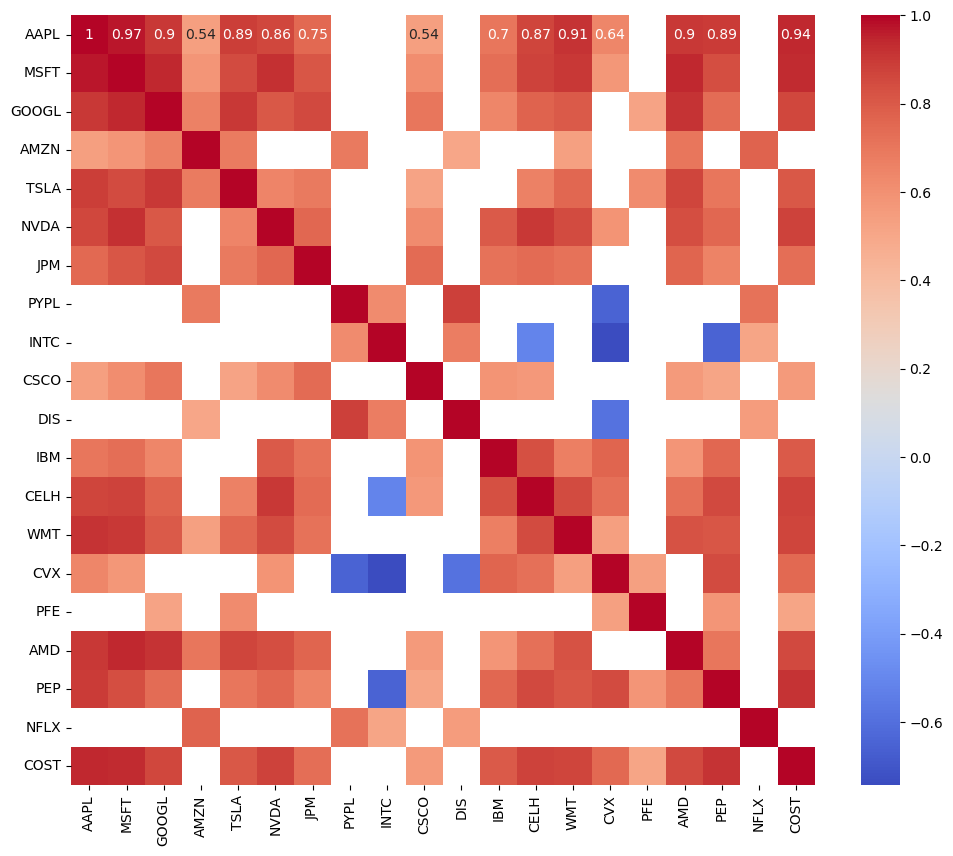

In [552]:
corr_matrix = adj_close_df.corr()
mask = (corr_matrix >= -0.5) & (corr_matrix <= 0.5)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)

In [513]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [514]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights*252)

In [515]:
def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return (expected_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

In [516]:
from fredapi import Fred

fred = Fred(api_key='37d707ea29d05517c0f3f400b23644bb')
treasury_rate_10y = fred.get_series_latest_release('GS10')/100
risk_free_rate = treasury_rate_10y[-1]
risk_free_rate

/var/folders/t1/r4wwd84d6xb75g5c6kcczbsm0000gn/T/ipykernel_74138/2153171841.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  risk_free_rate = treasury_rate_10y[-1]


0.0406

In [517]:
def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

In [518]:
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.5) for _ in range(len(tickers))]

In [519]:
initial_weights = np.array([1/len(tickers)]*len(tickers))
initial_weights

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [520]:
optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
optimal_weights = optimized_results.x

print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")


Optimal Weights:
AAPL: 0.0000
MSFT: 0.0642
GOOGL: 0.0000
AMZN: 0.0105
TSLA: 0.0000
NVDA: 0.2085
JPM: 0.0000
PYPL: 0.0000
INTC: 0.0000
CSCO: 0.0000
DIS: 0.0000
IBM: 0.3477
CELH: 0.0177
WMT: 0.1151
CVX: 0.0000
PFE: 0.0000
AMD: 0.0000
PEP: 0.0000
NFLX: 0.0002
COST: 0.2360


In [521]:
optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Expected Annual Return: 0.5199
Expected Volatility: 0.1513
Sharpe Ratio: 3.1674


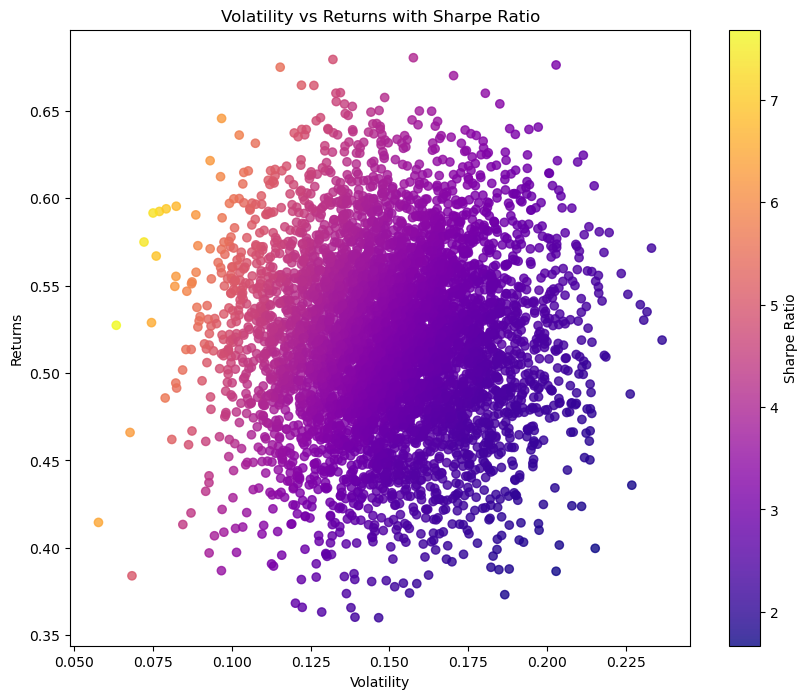

In [522]:
import matplotlib.pyplot as plt

num_samples = 5000

volatility_samples = np.random.normal(optimal_portfolio_volatility, 0.025, num_samples)
returns_samples = np.random.normal(optimal_portfolio_return, 0.05, num_samples)
sharpe_ratio_samples = (returns_samples - risk_free_rate) / volatility_samples

plt.figure(figsize=(10,8))
plt.scatter(volatility_samples, returns_samples, c=sharpe_ratio_samples, cmap='plasma', alpha=0.8)
cbar = plt.colorbar()
cbar.set_label('Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Volatility vs Returns with Sharpe Ratio')
plt.show()



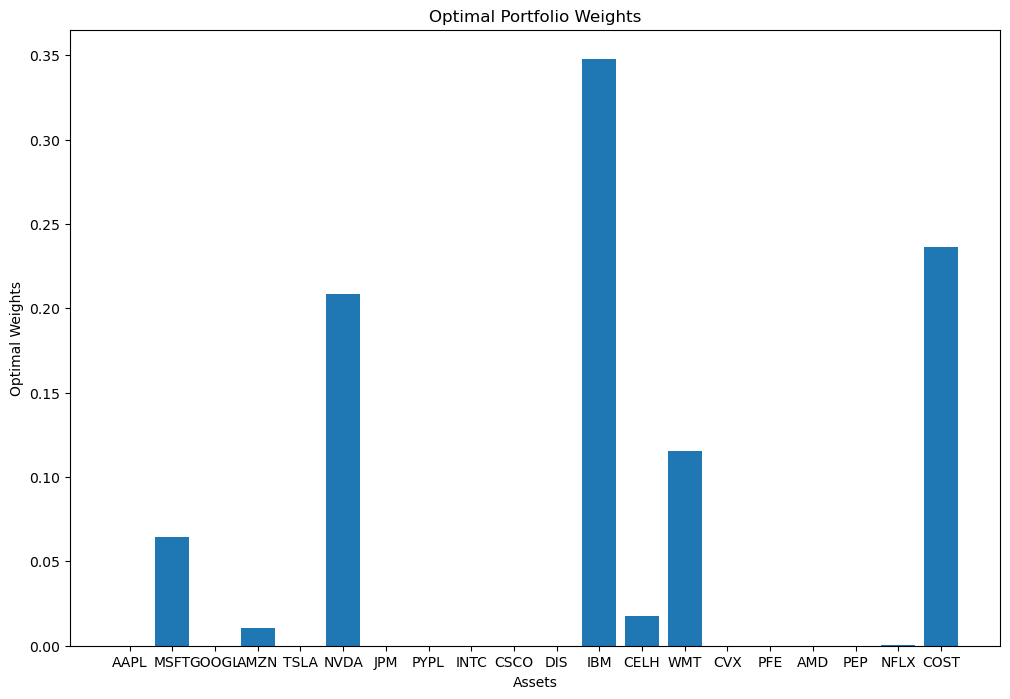

In [523]:
plt.figure(figsize=(12, 8))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()